In [1]:
#!/user/bin/env python
# -*- coding:utf-8 -*-
# author: Wei Li
# creat: 2022-3-29
# modify: 2022-3-29
# function: Implement the least square method and gradient descent method 
# for solving the linear regression problem


import numpy as np
import matplotlib.pyplot as plt

from utls import Generate_Samples,f,plot_samples,draw_histogram,draw_lines

In [2]:
# the parameter setting for generating 10 samples 
N  = 10
X_range = (-5,5)
mu = 0
sigma = 0.2

# generate N samples with the functions above
samples,epsilons = Generate_Samples(N,X_range,mu,sigma,f)
samples = sorted(samples,key=lambda samples:samples[0])

In [3]:
# display the generated samples
for i in range(len(samples)):
    print("(%d)\t[x,y,epsilon] = [%.2f, %.2f, %.2f]"%(i+1,samples[i][0],samples[i][1],epsilons[i]))

(1)	[x,y,epsilon] = [-4.73, 1.15, 0.32]
(2)	[x,y,epsilon] = [-3.60, -0.07, -0.12]
(3)	[x,y,epsilon] = [-3.02, -0.89, -0.11]
(4)	[x,y,epsilon] = [-1.87, 0.14, -0.21]
(5)	[x,y,epsilon] = [-0.83, 0.74, 0.17]
(6)	[x,y,epsilon] = [0.59, 0.50, -0.46]
(7)	[x,y,epsilon] = [1.70, -0.59, 0.35]
(8)	[x,y,epsilon] = [1.92, -0.77, -0.15]
(9)	[x,y,epsilon] = [3.01, -1.21, 0.06]
(10)	[x,y,epsilon] = [4.68, -0.99, -0.05]


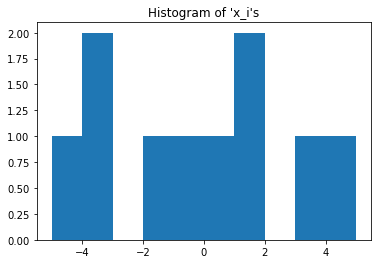

In [4]:
# Plot the uniform distribution of 'x_i's
draw_histogram([s[0] for s in samples],[x for x in range(-5,6)],title="Histogram of 'x_i's")

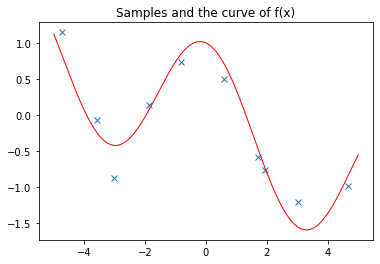

In [5]:
# plot sample dispersion and the curve of y_i = f(x_i)
plot_samples(samples)
x = np.linspace(-5,5,1000)
draw_lines(x,f(x),title="Samples and the curve of f(x)",show=True)

In [6]:
x_data = np.array([s[0] for s in samples]).reshape(-1,1)
y_data = np.array([s[1] for s in samples]).reshape(-1,1)
# =============================================================================
# OLS methods
from OLS import OLS

ols = OLS(1,1)
ols.fit(x_data,y_data)
print("[OLS] square error: ",ols.square_error(x_data,y_data))

[OLS] weight matrix:
 [[-0.16576646]]
[OLS] bias vector:
 [[-0.23364877]]
[OLS] square error:  0.3539150289218257


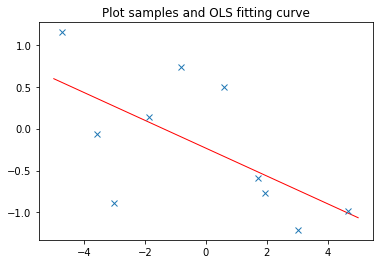

In [7]:
# draw the line of OLS
x = np.linspace(-5,5,1000).reshape(-1,1)
draw_lines(x,ols.predict(x))
plot_samples(samples,title="Plot samples and OLS fitting curve",show=True)

In [8]:
# =============================================================================
# GD methods
from GD import GD
gd = GD(1,1)
gd.fit(x_data,y_data)
print("[GD] square error: ",gd.square_error(x_data,y_data))

[GD] epoch:  0  loss:  0.6296166387066864
[GD] epoch:  10  loss:  0.360861324093908
[GD] epoch:  20  loss:  0.35477072233523826
[GD] epoch:  30  loss:  0.3540204392448279
[GD] epoch:  40  loss:  0.3539280141055624
[GD] epoch:  50  loss:  0.35391662852793526
[GD] converge at epoch:  50
[GD] stop training.
[GD] weight matrix:
  [[-0.16573469]]
[GD] bias vector:
  [[-0.2325068]]
[GD] square error:  0.35391632630884895


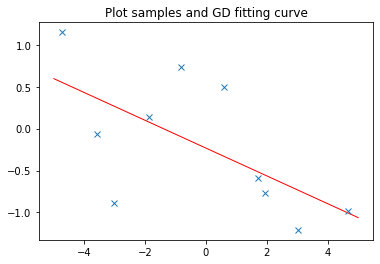

In [9]:
# draw the line of GD
x = np.linspace(-5,5,1000).reshape(-1,1)
draw_lines(x,gd.predict(x))
plot_samples(samples,title="Plot samples and GD fitting curve",show=True)

[OLS] square error for poly degree (1): 0.35391503
[OLS] square error for poly degree (2): 0.34694452
[OLS] square error for poly degree (3): 0.33418325
[OLS] square error for poly degree (4): 0.05178601
[OLS] square error for poly degree (5): 0.04640876
[OLS] square error for poly degree (6): 0.01626406
[OLS] square error for poly degree (7): 0.00926700
[OLS] square error for poly degree (8): 0.00064602
[OLS] square error for poly degree (9): 0.00000000
[OLS] square error for poly degree (10): 0.05551033


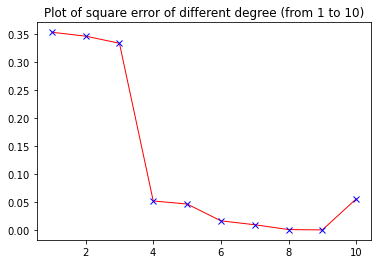

In [10]:
# Solve polynomial regression issues with minimum multiplication.
# =============================================================================
# OLS methods
from OLS import OLS
from utls import poly
error_of_different_degree = []
max = 10
for i in range(1,max+1):
    n = i  # the degree of polynomial
    x_data_poly = poly(x_data,n)  # generate the polynomial data
    ols_poly = OLS(n,1)
    ols_poly.fit(x_data_poly,y_data,show_parameters=False)
    performance = ols_poly.square_error(x_data_poly,y_data)
    print("[OLS] square error for poly degree (%d): %.8f"%(i,performance))
    error_of_different_degree.append([i,performance])
draw_lines(np.array(error_of_different_degree)[:,0],np.array(error_of_different_degree)[:,1],title="Plot of square error of different degree (from 1 to %d)"%(max),show=True,with_marker=True)

[OLS] square error for poly degree (10): 0.34694452


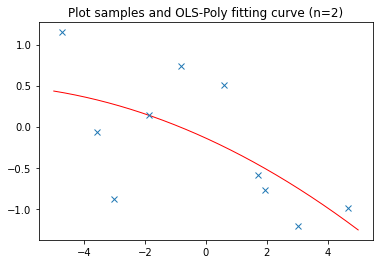

In [15]:
n = 2 # 2,4,5,10  # the degree of polynomial
x_data_poly = poly(x_data,n)  # generate the polynomial data
ols_poly = OLS(n,1)
ols_poly.fit(x_data_poly,y_data,show_parameters=False)
print("[OLS] square error for poly degree (%d): %.8f"%(i,ols_poly.square_error(x_data_poly,y_data)))
# draw the line of OLS for polynomial regression
x = np.linspace(-5,5,1000).reshape(-1,1)
x_poly = poly(x,n)
draw_lines(x,ols_poly.predict(x_poly))
plot_samples(samples,title="Plot samples and OLS-Poly fitting curve (n=%d)"%(n),show=True)

[OLS] weight matrix:
 [[-0.15037102]
 [-0.27776141]
 [-0.00288701]
 [ 0.01153878]]
[OLS] bias vector:
 [[0.60467641]]
[OLS] square error for poly degree (10): 0.05178601


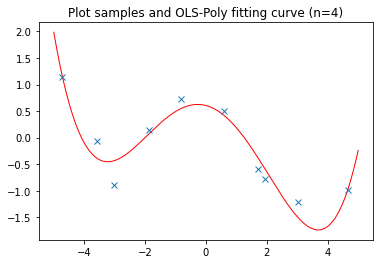

In [40]:

n = 4 # 2,4,5,10  # the degree of polynomial
x_data_poly = poly(x_data,n)  # generate the polynomial data
ols_poly = OLS(n,1)
ols_poly.fit(x_data_poly,y_data,show_parameters=True)
print("[OLS] square error for poly degree (%d): %.8f"%(i,ols_poly.square_error(x_data_poly,y_data)))
# draw the line of OLS for polynomial regression
x = np.linspace(-5,5,1000).reshape(-1,1)
x_poly = poly(x,n)
draw_lines(x,ols_poly.predict(x_poly))
plot_samples(samples,title="Plot samples and OLS-Poly fitting curve (n=%d)"%(n),show=True)

[OLS] square error for poly degree (10): 0.04640876


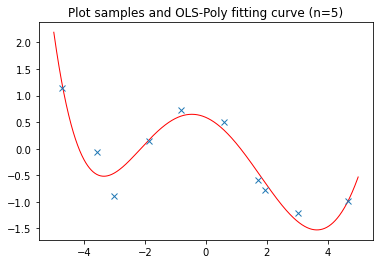

In [20]:
n = 5 # 2,4,5,10  # the degree of polynomial
x_data_poly = poly(x_data,n)  # generate the polynomial data
ols_poly = OLS(n,1)
ols_poly.fit(x_data_poly,y_data,show_parameters=False)
print("[OLS] square error for poly degree (%d): %.8f"%(i,ols_poly.square_error(x_data_poly,y_data)))
# draw the line of OLS for polynomial regression
x = np.linspace(-5,5,1000).reshape(-1,1)
x_poly = poly(x,n)
draw_lines(x,ols_poly.predict(x_poly))
plot_samples(samples,title="Plot samples and OLS-Poly fitting curve (n=%d)"%(n),show=True)

[OLS] square error for poly degree (10): 0.05551033


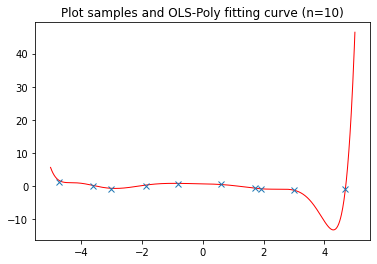

In [18]:
n = 10 # 2,4,5,10  # the degree of polynomial
x_data_poly = poly(x_data,n)  # generate the polynomial data
ols_poly = OLS(n,1)
ols_poly.fit(x_data_poly,y_data,show_parameters=False)
print("[OLS] square error for poly degree (%d): %.8f"%(i,ols_poly.square_error(x_data_poly,y_data)))
# draw the line of OLS for polynomial regression
x = np.linspace(-5,5,1000).reshape(-1,1)
x_poly = poly(x,n)
draw_lines(x,ols_poly.predict(x_poly))
plot_samples(samples,title="Plot samples and OLS-Poly fitting curve (n=%d)"%(n),show=True)